In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input,Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_test=x_train/225,x_test/225

In [ ]:
K=len(set(y_train.flatten()))
K

10

In [ ]:
i=Input(shape=x_train[0].shape)
#convolution layer 
x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
#pooling
x=MaxPooling2D((2,2))(x)
#Batch Normalization
x=BatchNormalization()(x)
#convolution layer 
x=Conv2D(64,(3,3),activation='relu',padding='same')(x)
#pooling
x=MaxPooling2D((2,2))(x)
#Batch Normalization
x=BatchNormalization()(x)
#convolution layer 
x=Conv2D(32,(3,3),activation='relu',padding='same')(x)
#pooling
x=MaxPooling2D((2,2))(x)
#Batch Normalization
x=BatchNormalization()(x)
#flatten layer
x=Flatten()(x)
#drop out some data
x=Dropout(0.2)(x)
#Dense layer
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)
model=Model(i,x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 116s 74ms/step - loss: 1.5730 - accuracy: 0.4517 - val_loss: 1.0486 - val_accuracy: 0.6258
Epoch 2/15
1563/1563 [==============================] - 113s 72ms/step - loss: 0.9789 - accuracy: 0.6560 - val_loss: 0.9348 - val_accuracy: 0.6784
Epoch 3/15
1563/1563 [==============================] - 110s 70ms/step - loss: 0.8163 - accuracy: 0.7154 - val_loss: 1.1057 - val_accuracy: 0.6204
Epoch 4/15
1563/1563 [==============================] - 109s 70ms/step - loss: 0.7329 - accuracy: 0.7426 - val_loss: 0.7880 - val_accuracy: 0.7280
Epoch 5/15
1563/1563 [==============================] - 109s 70ms/step - loss: 0.6389 - accuracy: 0.7768 - val_loss: 0.7545 - val_accuracy: 0.7408
Epoch 6/15
1563/1563 [==============================] - 117s 75ms/step - loss: 0.5870 - accuracy: 0.7919 - val_loss: 0.8521 - val_accuracy: 0.7117
Epoch 7/15
1563/1563 [==============================] - 110s 70ms/step - loss: 0.5346 - accuracy: 0.8136 - val_loss: 0

In [ ]:
data_generator=ImageDataGenerator(horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)
train_datagen=data_generator.flow(x_train,y_train,batch_size=32)
print(len(train_datagen))
steps_per_epoch=x_train.shape[0]
print(steps_per_epoch)


r=model.fit_generator(train_datagen,steps_per_epoch=steps_per_epoch,epochs=10)

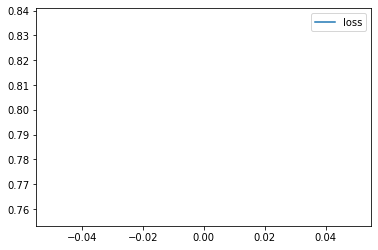

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.legend()

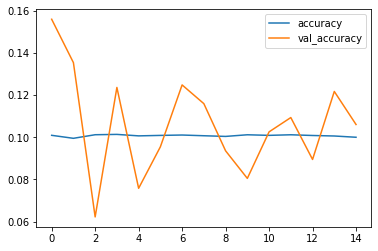

In [ ]:



plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()